In [ ]:
# small notebook to visualize the results of the simulations
# not familiar enough with plotting in java
# Author: Antoine A. Ruzette 

In [2]:
# import packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

/var/folders/3b/6sb_mkrj5jz7x94kf6pw1vmw0000gq/T/ipykernel_98865/2679163764.py:2: DtypeWarning: Columns (0,1,2,3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/simulation_data.csv')


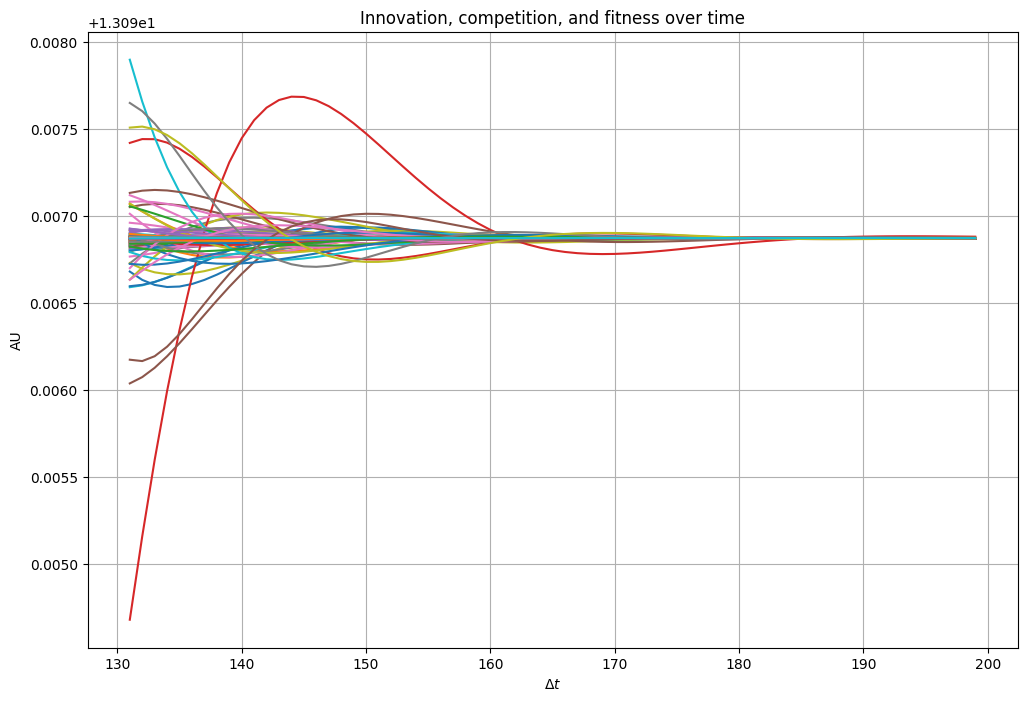

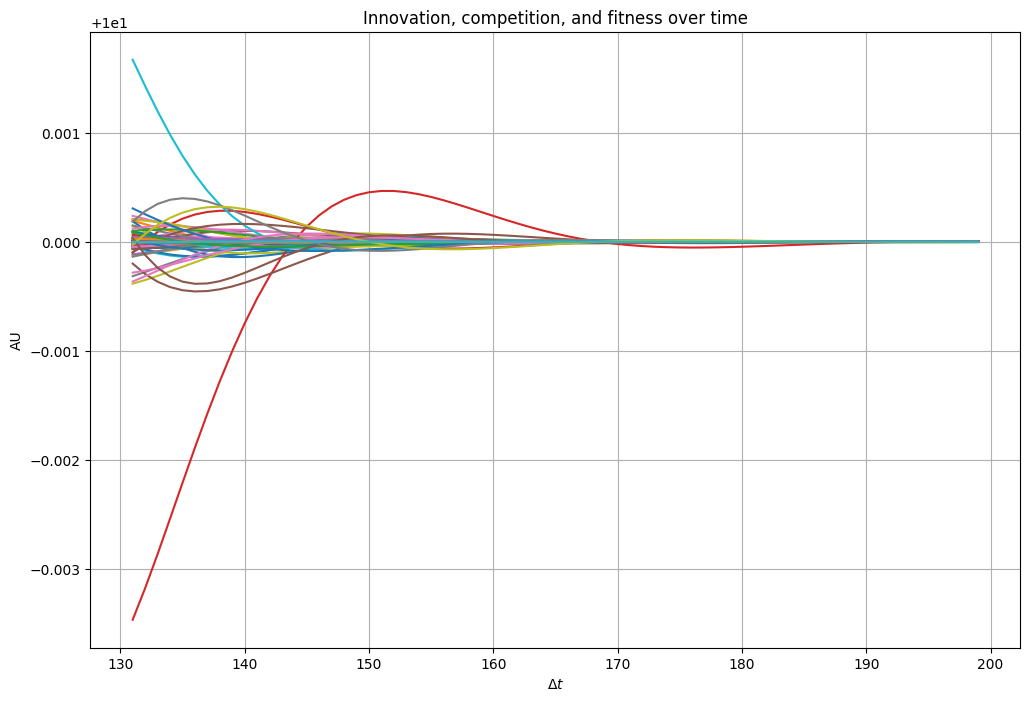

In [30]:
# load csv data
df = pd.read_csv('../data/simulation_data.csv')

# plot for each group
plt.figure(figsize=(12, 8))

for group_id in range(200):
    group_data = df[df['GroupID'] == group_id]
    plt.plot(group_data['TimeStep'], group_data['Innovation'], label=f'Group {group_id} Innovation')
    # plt.plot(group_data['TimeStep'], group_data['Competition'], label=f'Group {group_id} Competition')
    # plt.plot(group_data['TimeStep'], group_data['Fitness'], label=f'Group {group_id} Fitness')

plt.xlabel(r'$\Delta t$')
plt.ylabel('AU')
plt.title('Innovation, competition, and fitness over time')
# plt.legend()
plt.grid(True)
plt.savefig('../images/innovation_level_innovation.png', dpi=300)
plt.show()

# plot for each group
plt.figure(figsize=(12, 8))

for group_id in range(200):
    group_data = df[df['GroupID'] == group_id]
    # plt.plot(group_data['TimeStep'], group_data['Innovation'], label=f'Group {group_id} Innovation')
    plt.plot(group_data['TimeStep'], group_data['Competition'], label=f'Group {group_id} Competition')
    # plt.plot(group_data['TimeStep'], group_data['Fitness'], label=f'Group {group_id} Fitness')

plt.xlabel(r'$\Delta t$')
plt.ylabel('AU')
plt.title('Innovation, competition, and fitness over time')
# plt.legend()
plt.grid(True)
plt.savefig('../images/innovation_level_competition.png', dpi=300)
plt.show()


/var/folders/3b/6sb_mkrj5jz7x94kf6pw1vmw0000gq/T/ipykernel_98865/3201589140.py:2: DtypeWarning: Columns (0,1,2,3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/simulation_data.csv')


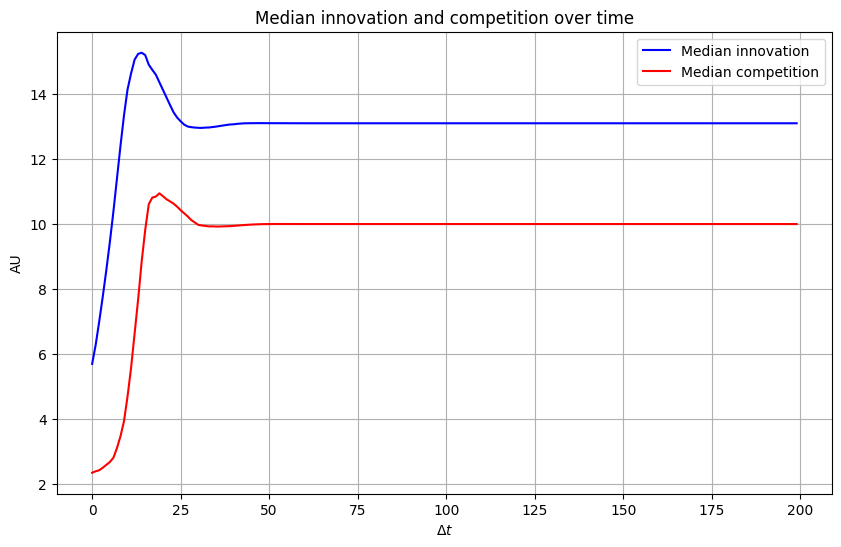

In [31]:
# load csv data
df = pd.read_csv('../data/simulation_data.csv')

# convert to float
df['Innovation'] = pd.to_numeric(df['Innovation'], errors='coerce')
df['Competition'] = pd.to_numeric(df['Competition'], errors='coerce')
df['TimeStep'] = pd.to_numeric(df['TimeStep'], errors='coerce')

# median innovation and competition over groups at each time step
median_metrics = df.groupby('TimeStep').agg({
    'Innovation': 'median',
    'Competition': 'median'
}).reset_index()

# plot
plt.figure(figsize=(10, 6))

plt.plot(median_metrics['TimeStep'], median_metrics['Innovation'], label='Median innovation', color='blue')
plt.plot(median_metrics['TimeStep'], median_metrics['Competition'], label='Median competition', color='red')

plt.xlabel(r'$\Delta t$')
plt.ylabel('AU')
plt.title('Median innovation and competition over time')
plt.legend()
plt.grid(True)
plt.savefig('../images/median_innovation_competition.png', dpi=300)
plt.show()